In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, roc_auc_score


import json
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize.punkt import PunktToken
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import lda
from sklearn.decomposition import TruncatedSVD


import warnings
warnings.filterwarnings('ignore')

# **1.Exploring Data**

## **1.1.Display data by Pandas**

**Read file csv**

In [ ]:
dataTrain = pd.read_csv('train.tsv', delimiter='\t',encoding='utf-8')
dataTest = pd.read_csv('test.tsv', delimiter='\t',encoding='utf-8')

**Concat data train and data test**

In [72]:
dataAll = dataTrain.append(dataTest, ignore_index=True)
dataAll['Type'] = 'training'
dataAll['Type'][np.isnan(dataAll.label)] = 'testing'

**Access data**

In [73]:
dataAll.head(10)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,Type
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,24,0,5424,170,8,0.152941,0.079130,0.0,training
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,40,0,4973,187,9,0.181818,0.125448,1.0,training
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,55,0,2240,258,11,0.166667,0.057613,1.0,training
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,0,24,0,2737,120,5,0.041667,0.100858,1.0,training
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,14,0,12032,162,10,0.098765,0.082569,0.0,training
5,http://www.conveniencemedical.com/genital-herp...,7018,"{""url"":""conveniencemedical genital herpes home...",?,?,119.000000,0.745455,0.581818,0.290909,0.018182,...,0,12,?,4368,55,3,0.054545,0.087356,0.0,training
6,http://gofashionlane.blogspot.tw/2012/06/ameri...,8685,"{""title"":""fashion lane American Wild Child "",""...",arts_entertainment,0.22111,0.773810,0.215054,0.053763,0.043011,0.043011,...,0,21,0,1287,93,3,0.548387,0.064327,1.0,training
7,http://www.insidershealth.com/article/racing_f...,3402,"{""url"":""insidershealth article racing for reco...",?,?,1.883333,0.719697,0.265152,0.113636,0.015152,...,0,5,?,27656,132,4,0.068182,0.148551,0.0,training
8,http://www.valetmag.com/the-handbook/features/...,477,"{""title"":""Valet The Handbook 31 Days 31 days"",...",?,?,0.471503,0.190722,0.036082,0.000000,0.000000,...,0,17,0,2471,194,7,0.644330,0.125000,1.0,training
9,http://www.howsweeteats.com/2010/03/24/cookies...,6731,"{""url"":""howsweeteats 2010 03 24 cookies and cr...",?,?,2.410112,0.469325,0.101227,0.018405,0.003067,...,1,14,?,11459,326,4,0.236196,0.094412,1.0,training


In [75]:
dataAll[7680:7690]

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,Type
7680,http://www.amazingsuperpowers.com/2008/07/shar...,480,"{""title"":""Webcomic at the Speed of Light Shark...",science_technology,0.480736,1.762821,0.592357,0.267516,0.248408,0.242038,...,0,36,0,2226,157,2,0.254777,0.092308,NaN,testing
7681,http://www.cbc.ca/news/health/story/2011/02/23...,2457,"{""title"":""Cannabis whets appetite for cancer p...",?,?,2.951389,0.549383,0.290123,0.154321,0.055556,...,1,32,0,4846,162,5,0.092593,0.055066,NaN,testing
7682,http://www.rollingstone.com/music/photos/lady-...,5362,"{""title"":""Lady Gaga s Best Looks Pictures lady...",arts_entertainment,0.667,3.078261,0.567376,0.170213,0.056738,0.014184,...,1,74,0,634,141,6,0.163121,0.056818,NaN,testing
7683,https://www.thehunt.com/?page=174,7722,"{""title"":""What are you hunting for "",""body"":""S...",recreation,0.238356,2.733333,0.277228,0.059406,0.019802,0.000000,...,0,27,0,1620,101,1,0.059406,0.098655,NaN,testing
7684,http://www.epicurious.com/articlesguides/holid...,7940,"{""title"":""Easy Thanksgiving Recipes and Tips T...",culture_politics,0.644755,2.313253,0.560976,0.331010,0.080139,0.041812,...,1,26,0,8070,287,5,0.101045,0.091013,NaN,testing
7685,http://bakedbree.com/2010/02/peanut-butter-pie/,6104,"{""title"":""Peanut Butter Pie Recipe peanut butt...",?,?,2.297619,0.625000,0.291667,0.291667,0.291667,...,0,12,?,6031,120,3,0.325000,0.080189,NaN,testing
7686,http://fashion.elle.com/street-chic/,8853,"{""title"":""Street Fashion New York Street Fashi...",arts_entertainment,0.466948,1.723810,0.621495,0.252336,0.051402,0.004673,...,0,51,0,1646,214,2,0.056075,0.083333,NaN,testing
7687,http://shine.yahoo.com/channel/food/11-best-fa...,5813,"{""title"":""11 Best Fast Food Post Workout Snack...",business,0.59501,1.592105,0.229358,0.134557,0.064220,0.036697,...,1,10,0,21097,327,9,0.119266,0.078591,NaN,testing
7688,http://www.thatssotrue.com/view/story/2352,4769,"{""title"":""Sending your boyfriend A heartfelt t...",?,?,0.818182,0.073529,0.058824,0.000000,0.000000,...,0,23,0,992,68,2,0.558824,0.116667,NaN,testing
7689,http://asouthernfairytale.com/2011/07/11/homem...,2544,"{""title"":"" "",""body"":"" "",""url"":""asouthernfairyt...",arts_entertainment,0.627775,1.944206,0.702929,0.317992,0.301255,0.288703,...,1,15,0,11114,239,3,0.305439,0.250000,NaN,testing


**Data information**

In [76]:
dataAll.shape

(10566, 28)

In [77]:
dataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10566 entries, 0 to 10565
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             10566 non-null  object 
 1   urlid                           10566 non-null  int64  
 2   boilerplate                     10566 non-null  object 
 3   alchemy_category                10566 non-null  object 
 4   alchemy_category_score          10566 non-null  object 
 5   avglinksize                     10566 non-null  float64
 6   commonlinkratio_1               10566 non-null  float64
 7   commonlinkratio_2               10566 non-null  float64
 8   commonlinkratio_3               10566 non-null  float64
 9   commonlinkratio_4               10566 non-null  float64
 10  compression_ratio               10566 non-null  float64
 11  embed_ratio                     10566 non-null  float64
 12  framebased                      

**Understading data**

In [78]:
dataAll.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,10566.0,5283.500000,3050.285806,1.000000,2642.250000,5283.500000,7924.750000,10566.000000
avglinksize,10566.0,2.823754,12.904732,0.000000,1.605949,2.084034,2.615385,1062.000000
commonlinkratio_1,10566.0,0.467895,0.201926,0.000000,0.339668,0.480193,0.614852,1.000000
commonlinkratio_2,10566.0,0.212166,0.146180,0.000000,0.103896,0.200000,0.297872,1.000000
commonlinkratio_3,10566.0,0.091431,0.095443,0.000000,0.021505,0.067416,0.132743,0.980392
commonlinkratio_4,10566.0,0.048837,0.072308,0.000000,0.000000,0.021368,0.064516,0.980392
compression_ratio,10566.0,2.291272,5.757324,0.000000,0.442374,0.483160,0.580402,21.000000
embed_ratio,10566.0,-0.104571,0.307991,-1.000000,0.000000,0.000000,0.000000,0.928571
framebased,10566.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frameTagRatio,10566.0,0.056923,0.042005,0.000000,0.028610,0.046436,0.074074,0.444444


In [80]:
def info_columns(data_):
    total_na = data_.isna().sum().sum()
    print("Dimensional:", data_.shape[0], "rows,", data_.shape[1], "columns")
    print("Total NA values: %d" %(total_na))
    print("%38s%10s%10s%10s" %("Column Name", "Data type", "#Distinct", "#NaN"))
    col_name = data_.columns
    dtype = data_.dtypes
    uniq = data_.nunique()
    
    for i in range(len(col_name)):
        print("%38s%10s%10s%10s" %(col_name[i], dtype[i], uniq[i], data_[col_name[i]].isna().sum()))

info_columns(dataAll)

Dimensional: 10566 rows, 28 columns
Total NA values: 3171
                           Column Name Data type #Distinct      #NaN
                                   url    object     10566         0
                                 urlid     int64     10566         0
                           boilerplate    object     10565         0
                      alchemy_category    object        14         0
                alchemy_category_score    object      6776         0
                           avglinksize   float64      7634         0
                     commonlinkratio_1   float64      5731         0
                     commonlinkratio_2   float64      5119         0
                     commonlinkratio_3   float64      4118         0
                     commonlinkratio_4   float64      3347         0
                     compression_ratio   float64      9085         0
                           embed_ratio   float64       485         0
                            framebased     in

**Categorical data**

In [82]:
def infor_type(data_, type_column):
    categorical = [var for var in data_.columns if data_[var].dtype == type_column]
    for var in categorical:
        print(data_[var].value_counts())

In [83]:
infor_type(dataAll, 'object')

http://www.lifestylemirror.com/woman/fashion/best-dresses-your-body-type-how-look-good-spring/              1
http://foodporndaily.com/pictures/view/new-orleans-style-bbq-colossal-shrimp                                1
http://www.cnn.com/2012/01/06/health/vietnam-tumor/index.html?su_hlth                                       1
http://www.epicurious.com/recipes/food/views/Peanut-Butter-and-Chocolate-Balls-1318                         1
http://www.huffingtonpost.com/2013/04/29/nailed-it-15-unbelievable-gifs_n_3147438.html?utm_hp_ref=comedy    1
                                                                                                           ..
http://www.villagevoice.com/2013-02-13/news/Roman-Baca-Iraq-Ballet/                                         1
http://www.henrikadamsen.com/                                                                               1
http://www.telegraph.co.uk/technology/news/8956806/Technology-trends-of-2011-year-in-review.html            1
http://unf

In [84]:
infor_type(dataAll, 'int')

2047    1
7497    1
9542    1
3395    1
1346    1
       ..
4735    1
6782    1
637     1
2684    1
2049    1
Name: urlid, Length: 10566, dtype: int64
0    10566
Name: framebased, dtype: int64
0    10338
1      228
Name: hasDomainLink, dtype: int64
1    6914
0    3652
Name: lengthyLinkDomain, dtype: int64
16    286
13    281
19    269
18    266
14    265
     ... 
98      4
97      3
99      3
96      2
94      2
Name: linkwordscore, Length: 101, dtype: int64
423      37
0        25
88       12
155       9
780       8
         ..
6261      1
21745     1
4341      1
11502     1
14320     1
Name: non_markup_alphanum_characters, Length: 6711, dtype: int64
142     86
37      80
121     79
123     66
120     65
        ..
3283     1
1546     1
1626     1
483      1
787      1
Name: numberOfLinks, Length: 750, dtype: int64
4     1329
5     1288
3     1253
6     1148
7      949
2      942
0      914
8      721
1      664
9      488
10     299
11     220
12     135
13      99
14      51
15    

In [85]:
infor_type(dataAll, 'float')

2.000000    95
0.000000    54
2.333333    54
1.000000    50
2.500000    45
            ..
2.684211     1
2.963415     1
2.537634     1
3.490637     1
1.362500     1
Name: avglinksize, Length: 7634, dtype: int64
0.000000    321
0.333333     85
0.500000     82
0.297297     57
0.666667     44
           ... 
0.150442      1
0.316279      1
0.226286      1
0.308140      1
0.278302      1
Name: commonlinkratio_1, Length: 5731, dtype: int64
0.000000    839
0.081081     65
0.250000     59
0.111111     51
0.333333     49
           ... 
0.100457      1
0.216374      1
0.226619      1
0.388268      1
0.139159      1
Name: commonlinkratio_2, Length: 5119, dtype: int64
0.000000    1788
0.027027      72
0.111111      45
0.125000      39
0.142857      38
            ... 
0.078261       1
0.180422       1
0.259459       1
0.073232       1
0.167476       1
Name: commonlinkratio_3, Length: 4118, dtype: int64
0.000000    3303
0.016129      30
0.016667      29
0.014085      27
0.052632      27
         

## **1.2.Visualize numeric variable**

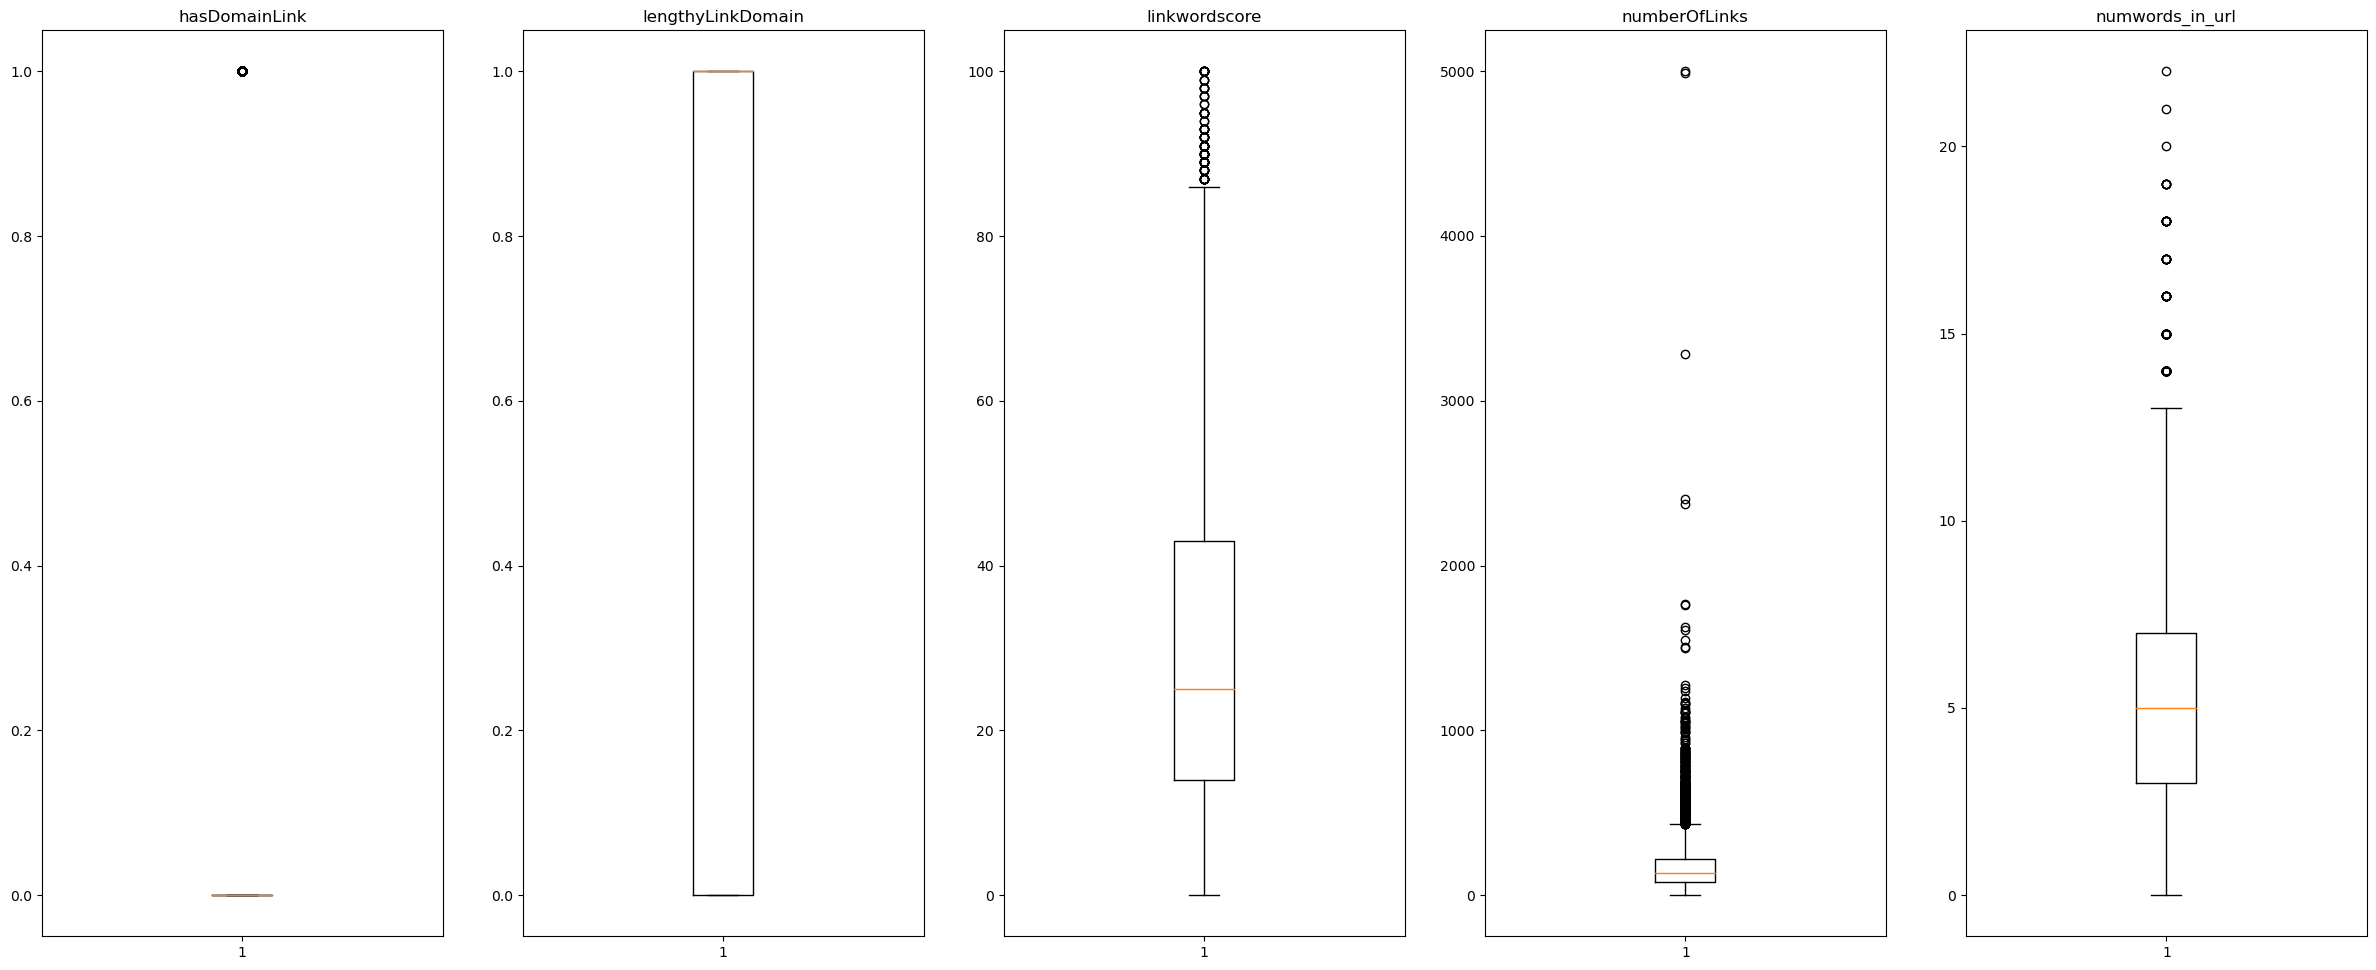

In [89]:
plt.figure(figsize= (30,12), dpi =100)

columns = ["hasDomainLink", "lengthyLinkDomain", "linkwordscore", "numberOfLinks", "numwords_in_url"]

for i in range(len(columns)):
    plt.subplot(1, len(columns), i+1)
    plt.title("{}".format(columns[i]))
    plt.boxplot(dataAll[columns[i]], whis= 1.5)

In [4]:
def fill_new_front_page(data_):
    dic = {x: 0 for x in data_['website_type'].values}
    for x in dic.keys():
        count_front_page1 = (data_[data_['news_front_page'] == 1]['website_type'].values == x).sum()
        count_front_page0 = (data_[data_['news_front_page'] == 0]['website_type'].values == x).sum()
        if count_front_page1 > count_front_page0:
            dic[x] = 1
        elif count_front_page1 == count_front_page0:
            dic[x] = np.random.randint(2)
        else:
            dic[x] = 0
    
    for i in range(data_.shape[0]):
        if data_[i:i+1]['news_front_page'].values == -1:
            data_[i:i+1]['news_front_page'].replace(-1, dic.get(data_[i:i+1]['website_type'].values[0]),
                                                    inplace= True)
    
    return data_

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def new_link_pre(df_train):
    linktrain1 = set(df_train[df_train['label'] == 1]['linkwordscore'].values)
    linktrain0 = set(df_train[df_train['label'] == 0]['linkwordscore'].values)
    link = list(linktrain1.intersection(linktrain0))
    
    val_count1 = []
    val_count0 = []
    for x in link:
        ah = df_train[df_train['linkwordscore'] == x]['label'].value_counts()
        val_count0.append(ah[0])
        val_count1.append(ah[1])
        
    for x in list(linktrain0 - linktrain1):
        link.append(x)
        val_count0.append(df_train[df_train['linkwordscore'] == x]['label'].value_counts()[0])
        val_count1.append(0)
    for x in list(linktrain1 - linktrain0):
        link.append(x)
        val_count1.append(df_train[df_train['linkwordscore'] == x]['label'].value_counts()[1])
        val_count0.append(0)
        
    rel = []
    for x in range(len(link)):
        prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
        if prob_1 <= 0.4:
            rel.append(sigmoid(-prob_1 - 2*(1-prob_1)))
            
        elif prob_1 >= 0.6:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(prob_1*2 + (1-prob_1)))
            
        else:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
            rel.append(sigmoid(2*(prob_1 - (1-prob_1))))
    
    linkpd = pd.DataFrame({'linkscore': link, 'label = 1': val_count1,
                           'label = 0': val_count0,'result_prob': rel})

    relsprob = []
    for x in df_train['linkwordscore'].values:
        relsprob.append(linkpd[linkpd['linkscore'] == x]['result_prob'].values[0])
    
    return relsprob, linkpd

def lld_nol_pre(df_train):
    linktrain1 = set(df_train[df_train['lengthyLinkDomain'] == 1]['numberOfLinks'].values)
    linktrain0 = set(df_train[df_train['lengthyLinkDomain'] == 0]['numberOfLinks'].values)
    link = list(linktrain1.intersection(linktrain0))
    
    val_count1 = []
    val_count0 = []
    for x in link:
        ah = df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()
        val_count0.append(ah[0])
        val_count1.append(ah[1])
        
    for x in list(linktrain0 - linktrain1):
        link.append(x)
        val_count0.append(df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()[0])
        val_count1.append(0)
    for x in list(linktrain1 - linktrain0):
        link.append(x)
        val_count1.append(df_train[df_train['numberOfLinks'] == x]['lengthyLinkDomain'].value_counts()[1])
        val_count0.append(0)
        
    rel = []
    for x in range(len(link)):
        prob_1 = val_count1[x] / (val_count0[x] + val_count1[x])
        if prob_1 <= 0.4:
            rel.append(sigmoid(-prob_1 - 2*(1-prob_1)))
            
        elif prob_1 >= 0.6:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(prob_1*2 + (1-prob_1)))
            
        else:
            prob_1 = val_count1[x] / (val_count0[x] + val_count1[x]) 
            rel.append(sigmoid(2*(prob_1 - (1-prob_1))))
    
    linkpd = pd.DataFrame({'numberOfLinks': link, 'lengthyLinkDomain = 1': val_count1,
                           'lengthyLinkDomain = 0': val_count0, 'result_prob': rel})

    relsprob = []
    for x in df_train['numberOfLinks'].values:
        relsprob.append(linkpd[linkpd['numberOfLinks'] == x]['result_prob'].values[0])
    
    return relsprob


from urllib.parse import urlparse

def countPaths(url):
    parsed = urlparse(url)
    domain = re.findall('\/',parsed.path)
    return len(domain)

In [36]:
def new_featurizes(data_):
    # Other Features
    data_['alchemy_category_score'] = pd.to_numeric(data_['alchemy_category_score'], errors= 'coerce')
    data_['alchemy_category_score'].fillna(data_['alchemy_category_score'].mean(), inplace= True)
    
    data_['news_front_page'] = pd.to_numeric(data_['news_front_page'], errors= 'coerce')
    data_['news_front_page'].fillna(-1, inplace= True)
    
    shape = data_['url'].shape[0]
    domain_1st, domain_2nd = ['' for x in range(shape)], ['' for x in range(shape)]
    domain_3rd = ['' for x in range(shape)]
    domain_4th, domain_5th = ['' for x in range(shape)], ['' for x in range(shape)]
    websitetype, websitetype2 = ['' for x in range(shape)], ['' for x in range(shape)]
    numpath = []
    for i, url in enumerate(data_['url']):
        numpath.append(countPaths(url))
        
        parsed = urlparse(url)
        domainname = parsed.netloc.lower().split('.')
        if len(domainname) == 2: 
            domain_2nd[i] = domainname[0]
            domain_1st[i] = domainname[1]
        if len(domainname) == 3:
            domain_3rd[i], domain_2nd[i] = domainname[0], domainname[1]
            domain_1st[i] = domainname[2]
        if len(domainname) == 4:
            domain_4th[i], domain_3rd[i] = domainname[0], domainname[1]
            domain_2nd[i], domain_1st[i] = domainname[2], domainname[3]
        if len(domainname) == 5:
            domain_5th[i], domain_4th[i], domain_3rd[i] = domainname[0], domainname[1], domainname[2]
            domain_2nd[i], domain_1st[i] = domainname[3], domainname[4]

        pathresub = parsed.path
        punctuation = ['/', '-', '_', '\.', ':']
        for punc in punctuation:
            pathresub = re.sub(punc, ' ', pathresub)
        pathresub = pathresub.lower().split(' ')
        if len(pathresub) == 2:
            websitetype[i] = pathresub[1]
        else:
            websitetype[i], websitetype2[i] = pathresub[1], pathresub[2]
    
    # Feafrom URL
    domains1_df = pd.get_dummies(domain_1st, prefix = 'DUM')
    domains4_df = pd.get_dummies(domain_4th, prefix = 'DUM')
    alchemyCategories_df = pd.get_dummies(data_.alchemy_category, prefix = 'DUM')
    num_word_url_df = pd.get_dummies(data_.numwords_in_url, prefix = 'DUM')
    numPaths_df = pd.get_dummies(numpath, prefix = 'DUM')
    data_ = pd.concat([data_, domains1_df, domains4_df,
                       alchemyCategories_df, num_word_url_df, numPaths_df], axis= 1)
    
    data_['domain_2nd'] = domain_2nd
    data_['domain_3rd'] = domain_3rd
    data_['domain_5th'] = domain_5th
    data_['website_type'] = websitetype
    data_['website_type'] = data_['website_type'].replace({'2006':'YEAR', '2007':'YEAR', '2008':'YEAR',
                                '2009':'YEAR','2010':'YEAR', '2011':'YEAR', '2012':'YEAR','2013':'YEAR',
                            '01':'MONTH', '02':'MONTH','03':'MONTH','04':'MONTH','05':'MONTH','06':'MONTH',
                            '07':'MONTH','08':'MONTH','09':'MONTH','10':'MONTH','11':'MONTH','12':'MONTH'})
    
    data_['website_type2'] = websitetype2
    data_['website_type2'] = data_['website_type2'].replace({'2006':'YEAR', '2007':'YEAR', '2008':'YEAR', 
                              '2009':'YEAR', '2010':'YEAR','2011':'YEAR', '2012':'YEAR','2013':'YEAR',
                            '01':'MONTH', '02':'MONTH','03':'MONTH','04':'MONTH','05':'MONTH','06':'MONTH',
                            '07':'MONTH','08':'MONTH','09':'MONTH','10':'MONTH','11':'MONTH','12':'MONTH',})

    data_['wordInHLT'] = data_['non_markup_alphanum_characters'] * data_['linkwordscore'] / 100
    data_['wordError'] = data_['non_markup_alphanum_characters'] * data_['spelling_errors_ratio']
    
    lld = lld_nol_pre(data_)
    data_['lld_nol_prob'] = lld
    
    data_.drop(columns= ['framebased','url', 'alchemy_category', 'numwords_in_url',
                         'urlid', 'boilerplate', 'is_news'], inplace= True)
    
    data_ = fill_new_front_page(data_)
    # Encoder
    le = LabelEncoder()
    fea = ['domain_2nd','domain_3rd', 'domain_5th', 'website_type', 'website_type2']
    for x in fea:
        le.fit(data_[x])
        data_[x] = le.transform(data_[x])
    
    data_ = fill_new_front_page(data_)
    return data_

In [37]:
newDataAll = dataAll.copy()
newDataAll = new_featurizes(newDataAll)

In [38]:
rels_prob, linkpd = new_link_pre(newDataAll[newDataAll['Type']=='training'])

for x in newDataAll[newDataAll['Type']=='testing']['linkwordscore'].values:
    rels_prob.append(linkpd[linkpd['linkscore'] == x]['result_prob'].values[0])
    
newDataAll['linkscorepredprob'] = rels_prob

In [70]:
dic = {x: 0 for x in newDataAll['website_type'].values}
for x in dic.keys():
    count_front_page1 = (newDataAll[newDataAll['news_front_page'] == 1]['website_type'].values == x).sum()
    count_front_page0 = (newDataAll[newDataAll['news_front_page'] == 0]['website_type'].values == x).sum()
    if count_front_page1 > count_front_page0:
        dic[x] = 1
    elif count_front_page1 == count_front_page0:
        dic[x] = np.random.randint(2)
    else:
        dic[x] = 0
    
for i in range(newDataAll.shape[0]):
    if newDataAll[i:i+1]['news_front_page'].values == -1:
        newDataAll[i:i+1]['news_front_page'] = dic.get(newDataAll[i:i+1]['website_type'].values[0])

In [71]:
newDataAll[newDataAll['news_front_page']==-1]

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,...,DUM_9,domain_2nd,domain_3rd,domain_5th,website_type,website_type2,wordInHLT,wordError,lld_nol_prob,linkscorepredprob
9,0.600813,2.410112,0.469325,0.101227,0.018405,0.003067,0.465859,0.0,0.012000,0,...,0,1515,630,0,321,665,1604.26,1081.870901,0.870917,0.581679
29,0.600813,1.154762,0.504425,0.427729,0.023599,0.000000,0.401048,0.0,0.032292,0,...,0,613,504,0,321,2634,392.00,16.225166,0.500000,0.155473
36,0.600813,2.618902,0.707317,0.336043,0.119241,0.051491,0.478082,0.0,0.046442,0,...,0,2313,61,0,321,665,2918.16,870.633911,0.880797,0.534827
39,0.975621,2.188312,0.569061,0.149171,0.055249,0.027624,0.430342,0.0,0.035058,0,...,0,2297,630,0,489,1602,1221.25,428.008175,0.869501,0.832228
44,0.600813,1.158209,0.505917,0.428994,0.023669,0.000000,0.423620,0.0,0.029319,0,...,0,613,504,0,321,2634,390.26,12.350000,0.125923,0.832018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,0.600813,3.368852,0.602649,0.414570,0.284768,0.200000,0.001197,-1.0,0.019978,0,...,0,2667,630,0,0,0,6387.75,0.000000,0.841131,0.158234
10553,0.600813,0.896296,0.125000,0.043750,0.031250,0.006250,0.485539,0.0,0.076104,0,...,0,1635,630,0,1116,2378,527.52,279.514451,0.842437,0.553639
10555,0.600813,2.267606,0.488372,0.162791,0.104651,0.093023,21.000000,-1.0,0.078905,0,...,0,1176,0,0,955,1426,682.33,1033.833335,0.531872,0.838730
10556,0.600813,4.065359,0.607143,0.321429,0.154762,0.119048,21.000000,-1.0,0.070055,0,...,0,2311,0,0,729,1341,612.80,76.600000,0.864472,0.155473


In [94]:
info_columns(newDataAll)

Dimensional: 10566 rows, 167 columns
Total NA values: 3171
                           Column Name Data type #Distinct      #NaN
                alchemy_category_score   float64      6777         0
                           avglinksize   float64      7633         0
                     commonlinkratio_1   float64      5731         0
                     commonlinkratio_2   float64      5118         0
                     commonlinkratio_3   float64      4117         0
                     commonlinkratio_4   float64      3347         0
                     compression_ratio   float64      9085         0
                           embed_ratio   float64       485         0
                         frameTagRatio   float64      7919         0
                         hasDomainLink     int64         2         0
                            html_ratio   float64     10530         0
                           image_ratio   float64      7323         0
                     lengthyLinkDomain     i

In [32]:
# def getColumnsFromBoilerplate(data_):
#     boilerplate = data_['boilerplate']

#     dicts = {
#         'title' : [],
#         'body' : [],
#         'url' : []
#     }
    
#     for i in range(len(boilerplate)):
#         temp = json.loads(boilerplate[i])
#         for j in dicts.keys():
#             dicts[j].append(temp.get(j, None))

#     boilerplate_df = pd.DataFrame()
#     boilerplate_df['title'] = dicts['title']
#     boilerplate_df['body'] = dicts['body']
    
#     return boilerplate_df

In [10]:
# boilerplateAll_df = getColumnsFromBoilerplate(dataAll)
# info_columns(boilerplateAll_df)

Dimensional: 10566 rows, 2 columns
Total NA values: 95
                           Column Name Data type #Distinct      #NaN
                                 title    object      9731        18
                                  body    object      9391        77


In [11]:
# def fillNanAndNone(data_):
#     fea = ['title', 'body']
#     for name in fea:
#         data_[name].fillna(" ", inplace= True)
#     return data_

# boilerplateAll_df = fillNanAndNone(boilerplateAll_df)
# info_columns(boilerplateAll_df)

Dimensional: 10566 rows, 2 columns
Total NA values: 0
                           Column Name Data type #Distinct      #NaN
                                 title    object      9731         0
                                  body    object      9391         0


In [10]:
stop_words = stopwords.words('english')
stop_word_add = ['becau','abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv']
for i in stop_word_add:
    stop_words.append(i)
    
def preprocessor(text):
    text = re.sub('[\W0-9]+', ' ', text.lower())
    return text

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [12]:


# def tfidf(data_):
#     tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', sublinear_tf=True,
#                 token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf= True, smooth_idf= True, binary=False,
#                 stop_words= stop_words, tokenizer= tokenizer_porter, preprocessor= preprocessor)
# #     tfv = TfidfVectorizer(stop_words= stop_words, tokenizer= tokenizer_porter, preprocessor= preprocessor)
#     bodyVectAll = tfv.fit_transform(data_['body'])
#     titleVectAll = tfv.fit_transform(data_['title'])
#     return bodyVectAll, titleVectAll

# bodyVectAll, titleVectAll = tfidf(boilerplateAll_df)

In [13]:
# def SVD(bodyVect, titleVect):
#     titleDecomposed = TruncatedSVD(random_state = 123, n_components = 10).fit_transform(titleVect)
#     bodyDecomposed = TruncatedSVD(random_state = 123, n_components = 50).fit_transform(bodyVect)    
#     textDecomposed = np.hstack([titleDecomposed,bodyDecomposed])
    
#     textDecomposed_training = textDecomposed[newDataAll.Type == 'training']
#     textDecomposed_testing = textDecomposed[newDataAll.Type == 'testing']
#     return textDecomposed_training, textDecomposed_testing

# textDecomposed_training, textDecomposed_testing = SVD(bodyVectAll, titleVectAll)

In [23]:
# boilerVect = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', sublinear_tf=True,
#                 token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf= True, smooth_idf= True, binary=False,
#                 stop_words= stop_words, tokenizer= tokenizer_porter, preprocessor= preprocessor).fit_transform(dataAll['boilerplate'])
boilerVect = TfidfVectorizer(stop_words= stop_words, tokenizer= tokenizer_porter, preprocessor= preprocessor).fit_transform(dataAll['boilerplate'])
boilerDecomposed = TruncatedSVD(random_state = 42, n_components = 200).fit_transform(boilerVect)

In [24]:
boilertrain = boilerDecomposed[newDataAll.Type == 'training']
boilertest = boilerDecomposed[newDataAll.Type == 'testing']

boilertrain.shape, boilertest.shape

((7395, 200), (3171, 200))

In [25]:
y_train = newDataAll[newDataAll['Type'] == 'training']['label']
trainData = newDataAll[newDataAll['Type'] == 'training'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
X_train = np.hstack([trainData.values, boilertrain])

testData = newDataAll[newDataAll['Type'] == 'testing'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
X_test = np.hstack([testData.values, boilertest])

X_train.shape, y_train.shape, X_test.shape

((7395, 390), (7395,), (3171, 390))

In [47]:
# y_train = newDataAll[newDataAll['Type'] == 'training']['label']
# trainData = newDataAll[newDataAll['Type'] == 'training'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
# X_train = np.hstack([trainData.values, textDecomposed_training])

# testData = newDataAll[newDataAll['Type'] == 'testing'][[x for x in newDataAll.columns if x not in ['label', 'Type']]]
# X_test = np.hstack([testData.values, textDecomposed_testing])

# X_train.shape, y_train.shape, X_test.shape

In [14]:
base_classifiers = [
                    ('Random Forest', RandomForestClassifier(n_estimators=1000, n_jobs= 4, min_samples_leaf= 2, bootstrap= True, min_samples_split= 5, max_features= .1, max_samples= 30)),
                    ('AdaBoost Classifier', AdaBoostClassifier()),
                    ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators= 300, learning_rate= 0.08, max_features= 4, min_samples_leaf= 2, min_samples_split= 5, max_depth= 7)),
                    ('Extra Trees Classifier', ExtraTreesClassifier()),
                    ('LightGBM', LGBMClassifier(n_estimators= 300, learning_rate= 0.08, num_leaves= 50,boosting_type= 'gbdt', objective= 'binary', sub_feature= 0.5, max_depth= 7)),
                    ('XGBM', XGBClassifier())]

# ('KNN', KNeighborsClassifier()),
# ('Naive Bayes', GaussianNB()),
# ('Decision Tree', DecisionTreeClassifier()),

In [15]:
def voting_prob(lis):
    return np.mean(lis)

In [26]:
pred_prob = []
for i in range(3):
    clf = StackingClassifier(estimators= base_classifiers, final_estimator= LogisticRegression(random_state= 102))
    clf.fit(X_train, y_train)
    x = clf.predict_proba(X_test)[:, 1]
    print(list(x))
    pred_prob.append(x)
    print("=================DONE==================\n")

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:28:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:31:25] WARNING: ../src/learner.cc:1061:

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:33:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:36:15] WARNING: ../src/learner.cc:1061:

[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:38:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set with sub_feature=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[17:41:38] WARNING: ../src/learner.cc:1061:

In [95]:
lis = [[] for i in range(dataTest.shape[0])]
for i in range(dataTest.shape[0]):
    for j in range(len(pred_prob)):
            lis[i].append(pred_prob[j][i])
            
rel = []
for i in range(dataTest.shape[0]):
    rel.append(voting_prob(lis[i]))

In [96]:
clf = SVC(probability= True)
clf.fit(X_train, y_train)
rel = clf.predict_proba(X_test)[:, 1]

In [97]:
rel

array([0.67649423, 0.29191636, 0.43484692, ..., 0.52265978, 0.63281436,
       0.61499461])

In [98]:
xx = pd.DataFrame({'urlid': dataTest['urlid'],'label': rel})
xx.to_csv('submit.csv', index= False)

In [ ]:
# def fea_importance(new_data, fea_import):
#     tes = new_data.columns.tolist()
#     tes.remove("label")
#     feature_importance_df = pd.DataFrame()
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["importance"] = fea_import
#     fold_importance_df["Feature"] = tes
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

#     cols = (feature_importance_df[["Feature", "importance"]]
#             .groupby("Feature")
#             .mean()
#             .sort_values(by="importance", ascending=False)[:5000].index)

#     best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

#     plt.figure(figsize=(12,8))
#     sns.barplot(x="importance",
#                 y="Feature",
#                 data=best_features.sort_values(by="importance",
#                                                 ascending=False))
#     plt.title('Features Importance')
#     plt.tight_layout()
#     plt.show()


#     imp = best_features.groupby('Feature')['importance'].median().sort_values(ascending=False)

In [ ]:
# fea = [[] for i in range(X_train.shape[1])]
# for i in range(X_train.shape[1]):
#     for j in range(len(fea_import)):
#             fea[i].append(fea_import[j][i])
            
# rels = []
# for i in range(X_train.shape[1]):
#     rels.append(voting_prob(fea[i]))

In [ ]:
# fea_importance(newDataAll, rels)